In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
#Importar Dataframe que contiene el trabajo semanal en la linea de volúmenes
df_vols_trabajo_semanal = pd.read_excel('./dataframes/df_vols_trabajo_semanal.xlsx')

In [3]:
#Preparar dataset
df_prophet = df_vols_trabajo_semanal.rename(columns={"semana_primer_dia": "ds", "tiempo_trabajo_horas": "y"})
df_prophet = df_prophet.drop(['semana', 'cantidad_fabricada', 'tiempo_trabajo', 'Unnamed: 0'], axis=1)

#Predeciremos 4 meses (16 semanaas, por tanto se testean 16 semanas)
fecha_max = df_vols_trabajo_semanal['semana_primer_dia'].max()
fecha_limite = fecha_max - pd.Timedelta(weeks = 15)
df_prophet_train = df_prophet[df_prophet['ds'] < pd.to_datetime(fecha_limite)]
df_prophet_test = df_prophet[df_prophet['ds'] >= pd.to_datetime(fecha_limite)]

print('Cantidad datos entrenamiento: ' + str(len(df_prophet_train)))
print('Cantidad datos test: ' + str(len(df_prophet_test)))

Cantidad datos entrenamiento: 169
Cantidad datos test: 16


In [4]:
#Preparar el dataset con las vacaciones:
vacation_weeks = df_prophet[df_prophet['y'] < 5][['ds']].copy()
vacation_weeks['holiday'] = 'cierre_programado'

future_vacations = pd.DataFrame({
    'ds': pd.to_datetime(['2024-08-12', '2024-08-19']),  # Fechas de las semanas 32 y 33 de 2024
    'holiday': 'cierre_programado'
})

all_vacations = pd.concat([vacation_weeks, future_vacations]).reset_index(drop=True)

## Ajuste de hiperparámetros: Tendencia

In [5]:
# Crear y entrenar el modelo Prophet

best_RMSE = float("inf")
best_changepoint_prior_scale = None

min_value = 0.01
max_value = 0.5
step = 0.01

changepoint_prior_scale_values= np.arange(min_value, max_value + step, step)

for changepoint_prior_scale_adjustment in changepoint_prior_scale_values:

    from prophet import Prophet
    
    model = Prophet(holidays=all_vacations, interval_width=0.8, changepoint_prior_scale= changepoint_prior_scale_adjustment) 
    
    model.fit(df_prophet_train)
    
    # Realizar una predicción para el futuro
    future = model.make_future_dataframe(periods=len(df_prophet_test), freq='W-MON')
    forecast = model.predict(future)
    
    #Comparar resultados
    y_pred_prophet = forecast[['ds','yhat']].tail(len(df_prophet_test))
    df_forecast_comparison_prophet = y_pred_prophet.merge(df_prophet_test, on= 'ds')
    
    RMSE = mean_squared_error(df_forecast_comparison_prophet['y'], df_forecast_comparison_prophet['yhat']) ** (1/2)

    print(RMSE)

    if RMSE < best_RMSE:
        best_changepoint_prior_scale = changepoint_prior_scale_adjustment

print(RMSE)
print(best_changepoint_prior_scale)

22:26:17 - cmdstanpy - INFO - Chain [1] start processing
22:26:17 - cmdstanpy - INFO - Chain [1] done processing
22:26:17 - cmdstanpy - INFO - Chain [1] start processing
22:26:17 - cmdstanpy - INFO - Chain [1] done processing


8.43506958304808
8.100817445433059


22:26:18 - cmdstanpy - INFO - Chain [1] start processing
22:26:18 - cmdstanpy - INFO - Chain [1] done processing


7.696161660457541


22:26:18 - cmdstanpy - INFO - Chain [1] start processing
22:26:18 - cmdstanpy - INFO - Chain [1] done processing


7.995848502613784


22:26:19 - cmdstanpy - INFO - Chain [1] start processing
22:26:19 - cmdstanpy - INFO - Chain [1] done processing


7.80486137211931


22:26:19 - cmdstanpy - INFO - Chain [1] start processing
22:26:19 - cmdstanpy - INFO - Chain [1] done processing


7.667716386750464


22:26:20 - cmdstanpy - INFO - Chain [1] start processing
22:26:20 - cmdstanpy - INFO - Chain [1] done processing


7.693377123169049


22:26:20 - cmdstanpy - INFO - Chain [1] start processing
22:26:20 - cmdstanpy - INFO - Chain [1] done processing


7.780178775899731


22:26:21 - cmdstanpy - INFO - Chain [1] start processing
22:26:21 - cmdstanpy - INFO - Chain [1] done processing


7.842751273013843


22:26:21 - cmdstanpy - INFO - Chain [1] start processing
22:26:21 - cmdstanpy - INFO - Chain [1] done processing


7.8366320227861515


22:26:22 - cmdstanpy - INFO - Chain [1] start processing
22:26:22 - cmdstanpy - INFO - Chain [1] done processing


7.827780138230479


22:26:22 - cmdstanpy - INFO - Chain [1] start processing
22:26:23 - cmdstanpy - INFO - Chain [1] done processing


7.784234483671492


22:26:23 - cmdstanpy - INFO - Chain [1] start processing
22:26:23 - cmdstanpy - INFO - Chain [1] done processing


7.760825590997948


22:26:24 - cmdstanpy - INFO - Chain [1] start processing
22:26:24 - cmdstanpy - INFO - Chain [1] done processing


7.803724052913482


22:26:24 - cmdstanpy - INFO - Chain [1] start processing
22:26:24 - cmdstanpy - INFO - Chain [1] done processing


7.783908403179647


22:26:25 - cmdstanpy - INFO - Chain [1] start processing
22:26:25 - cmdstanpy - INFO - Chain [1] done processing


7.818492613852972


22:26:25 - cmdstanpy - INFO - Chain [1] start processing
22:26:25 - cmdstanpy - INFO - Chain [1] done processing


7.808976497862741


22:26:26 - cmdstanpy - INFO - Chain [1] start processing
22:26:26 - cmdstanpy - INFO - Chain [1] done processing


7.7709636015801795


22:26:26 - cmdstanpy - INFO - Chain [1] start processing
22:26:26 - cmdstanpy - INFO - Chain [1] done processing


7.818614415835665


22:26:27 - cmdstanpy - INFO - Chain [1] start processing
22:26:27 - cmdstanpy - INFO - Chain [1] done processing
22:26:27 - cmdstanpy - INFO - Chain [1] start processing


7.808308311457166


22:26:27 - cmdstanpy - INFO - Chain [1] done processing


7.796384060383218


22:26:28 - cmdstanpy - INFO - Chain [1] start processing
22:26:28 - cmdstanpy - INFO - Chain [1] done processing


7.814880580789493


22:26:28 - cmdstanpy - INFO - Chain [1] start processing
22:26:28 - cmdstanpy - INFO - Chain [1] done processing


7.7745038868982315


22:26:29 - cmdstanpy - INFO - Chain [1] start processing
22:26:29 - cmdstanpy - INFO - Chain [1] done processing


7.762725843756156


22:26:29 - cmdstanpy - INFO - Chain [1] start processing
22:26:29 - cmdstanpy - INFO - Chain [1] done processing


7.719098374800216


22:26:30 - cmdstanpy - INFO - Chain [1] start processing
22:26:30 - cmdstanpy - INFO - Chain [1] done processing


7.644420543847549


22:26:30 - cmdstanpy - INFO - Chain [1] start processing
22:26:30 - cmdstanpy - INFO - Chain [1] done processing


7.604763858860903


22:26:31 - cmdstanpy - INFO - Chain [1] start processing
22:26:31 - cmdstanpy - INFO - Chain [1] done processing


7.587669221244843


22:26:31 - cmdstanpy - INFO - Chain [1] start processing
22:26:31 - cmdstanpy - INFO - Chain [1] done processing


7.541113912503026


22:26:32 - cmdstanpy - INFO - Chain [1] start processing
22:26:32 - cmdstanpy - INFO - Chain [1] done processing


7.531970102837234


22:26:32 - cmdstanpy - INFO - Chain [1] start processing
22:26:32 - cmdstanpy - INFO - Chain [1] done processing


7.494760067207833


22:26:33 - cmdstanpy - INFO - Chain [1] start processing
22:26:33 - cmdstanpy - INFO - Chain [1] done processing


7.364310919427311


22:26:33 - cmdstanpy - INFO - Chain [1] start processing
22:26:33 - cmdstanpy - INFO - Chain [1] done processing


7.414403489391651


22:26:34 - cmdstanpy - INFO - Chain [1] start processing
22:26:34 - cmdstanpy - INFO - Chain [1] done processing


7.377581115916904


22:26:34 - cmdstanpy - INFO - Chain [1] start processing
22:26:34 - cmdstanpy - INFO - Chain [1] done processing


7.329801631870126


22:26:35 - cmdstanpy - INFO - Chain [1] start processing
22:26:35 - cmdstanpy - INFO - Chain [1] done processing


7.27080832020721


22:26:36 - cmdstanpy - INFO - Chain [1] start processing
22:26:36 - cmdstanpy - INFO - Chain [1] done processing


7.284987588090925


22:26:36 - cmdstanpy - INFO - Chain [1] start processing
22:26:36 - cmdstanpy - INFO - Chain [1] done processing


7.265631050260217


22:26:37 - cmdstanpy - INFO - Chain [1] start processing
22:26:37 - cmdstanpy - INFO - Chain [1] done processing


7.182287766476698


22:26:37 - cmdstanpy - INFO - Chain [1] start processing
22:26:37 - cmdstanpy - INFO - Chain [1] done processing


7.190918241768798


22:26:38 - cmdstanpy - INFO - Chain [1] start processing
22:26:38 - cmdstanpy - INFO - Chain [1] done processing


7.10248875384471


22:26:38 - cmdstanpy - INFO - Chain [1] start processing
22:26:38 - cmdstanpy - INFO - Chain [1] done processing


7.175045747239786


22:26:39 - cmdstanpy - INFO - Chain [1] start processing
22:26:39 - cmdstanpy - INFO - Chain [1] done processing


7.0584560858905006


22:26:39 - cmdstanpy - INFO - Chain [1] start processing
22:26:39 - cmdstanpy - INFO - Chain [1] done processing


7.0790808243535315


22:26:40 - cmdstanpy - INFO - Chain [1] start processing
22:26:40 - cmdstanpy - INFO - Chain [1] done processing


7.093597935163005


22:26:40 - cmdstanpy - INFO - Chain [1] start processing
22:26:40 - cmdstanpy - INFO - Chain [1] done processing


7.061365069184803


22:26:41 - cmdstanpy - INFO - Chain [1] start processing
22:26:41 - cmdstanpy - INFO - Chain [1] done processing


7.006024872591029


22:26:41 - cmdstanpy - INFO - Chain [1] start processing
22:26:41 - cmdstanpy - INFO - Chain [1] done processing


6.9664655097231245


22:26:42 - cmdstanpy - INFO - Chain [1] start processing
22:26:42 - cmdstanpy - INFO - Chain [1] done processing


6.973552979434581


22:26:42 - cmdstanpy - INFO - Chain [1] start processing
22:26:42 - cmdstanpy - INFO - Chain [1] done processing


6.9291162630725776
6.9291162630725776
0.5


## Testeo del modelo

22:26:43 - cmdstanpy - INFO - Chain [1] start processing
22:26:43 - cmdstanpy - INFO - Chain [1] done processing


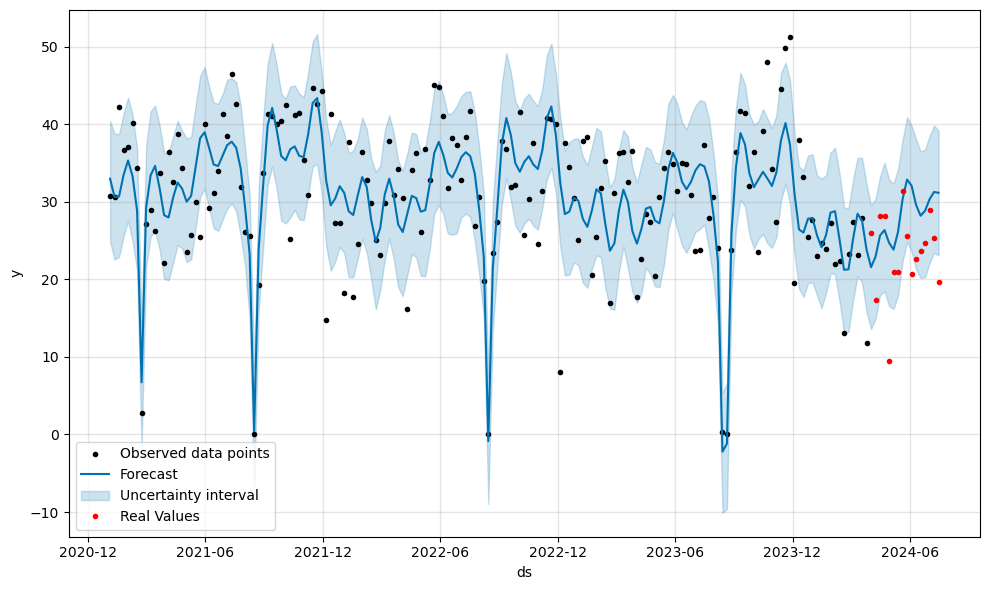

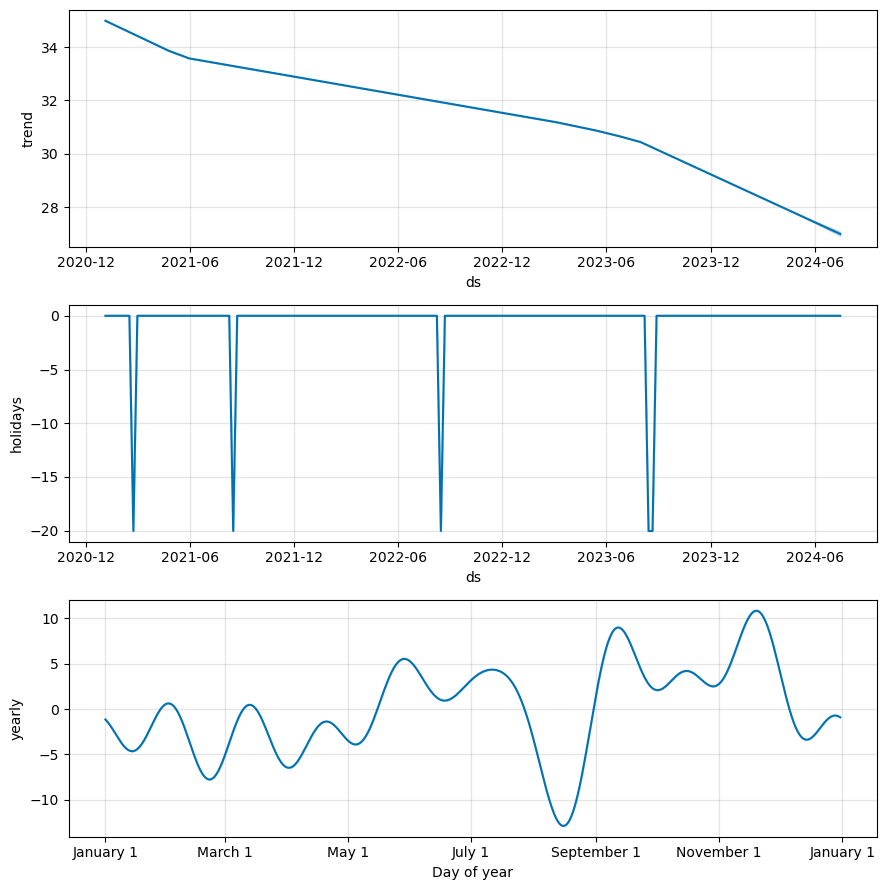

In [6]:
# Crear y entrenar el modelo Prophet
from prophet import Prophet

model = Prophet(holidays=all_vacations, interval_width=0.8, changepoint_prior_scale=best_changepoint_prior_scale) 

model.fit(df_prophet_train)

# Realizar una predicción para el futuro
future = model.make_future_dataframe(periods=len(df_prophet_test), freq='W-MON')
forecast = model.predict(future)

# Graficar los resultados
fig1 = model.plot(forecast)
plt.plot(df_prophet_test['ds'], df_prophet_test['y'], 'r.', label='Real Values')
plt.legend()
plt.show()

# Opcional: graficar los componentes de la predicción
fig2 = model.plot_components(forecast)
plt.show()

Error Prophet: -72.21659382591707


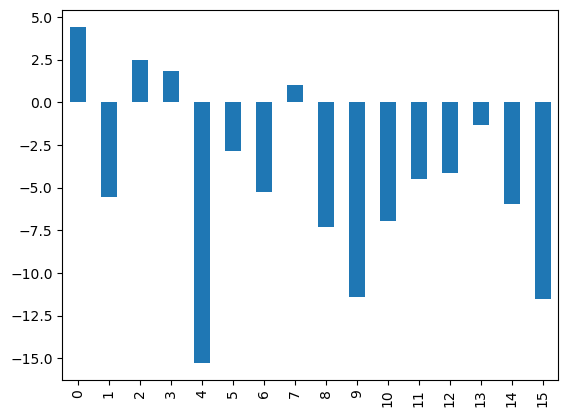

In [7]:
#Preparar dataset de comparación
y_pred_prophet = forecast[['ds','yhat']].tail(len(df_prophet_test))
df_forecast_comparison_prophet = y_pred_prophet.merge(df_prophet_test, on= 'ds')
df_forecast_comparison_prophet['error'] =  df_forecast_comparison_prophet['y'] - df_forecast_comparison_prophet['yhat']

df_forecast_comparison_prophet['error'].plot(kind = 'bar')
print('Error Prophet: ' + str(df_forecast_comparison_prophet['error'].sum()))

In [8]:
#Calcular métricas de error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print ('RMSE Prophet: ' + str(mean_squared_error(df_forecast_comparison_prophet['y'], df_forecast_comparison_prophet['yhat']) ** (1/2)))
print ('MAE Prophet: ' + str(mean_absolute_error(df_forecast_comparison_prophet['y'], df_forecast_comparison_prophet['yhat'])))
print ('MAPE Prophet: ' + str(mean_absolute_percentage_error(df_forecast_comparison_prophet['y'], df_forecast_comparison_prophet['yhat'])))

RMSE Prophet: 6.9291162630725776
MAE Prophet: 5.731481809384758
MAPE Prophet: 0.3149180419997475


<Axes: xlabel='ds', ylabel='y'>

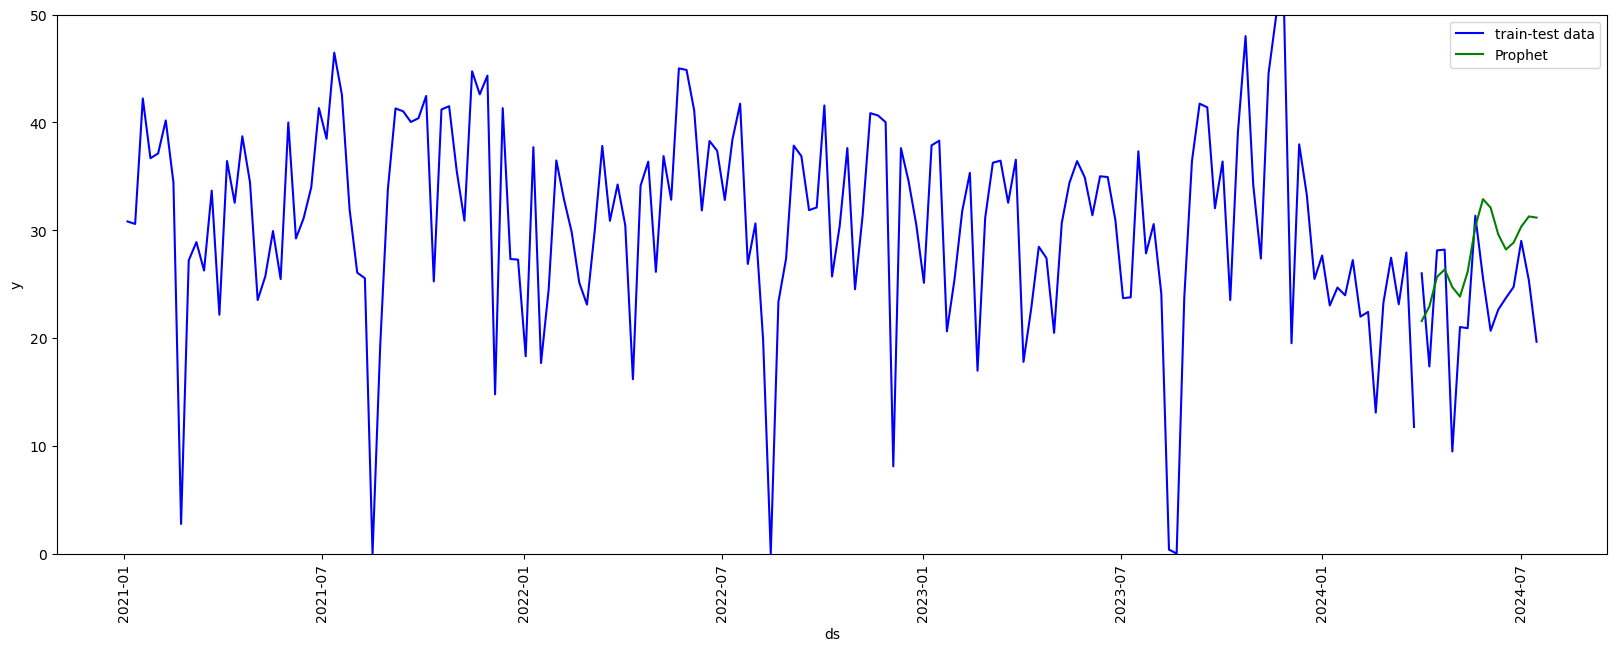

In [9]:
#Trabajo Semanal
dims = (20, 7)
fig, ax = plt.subplots(figsize=dims)
ax.set_ylim(0,50)
plt.xticks(rotation=90)
sns.lineplot(data = df_prophet_train, x= 'ds', y= 'y', color = 'blue', label = 'train-test data')
sns.lineplot(data = df_prophet_test, x= 'ds', y= 'y', color = 'blue')
sns.lineplot(data = y_pred_prophet, x= 'ds', y= 'yhat', color = 'green', label = 'Prophet')

## Predicción de valores futuros

22:26:45 - cmdstanpy - INFO - Chain [1] start processing
22:26:45 - cmdstanpy - INFO - Chain [1] done processing


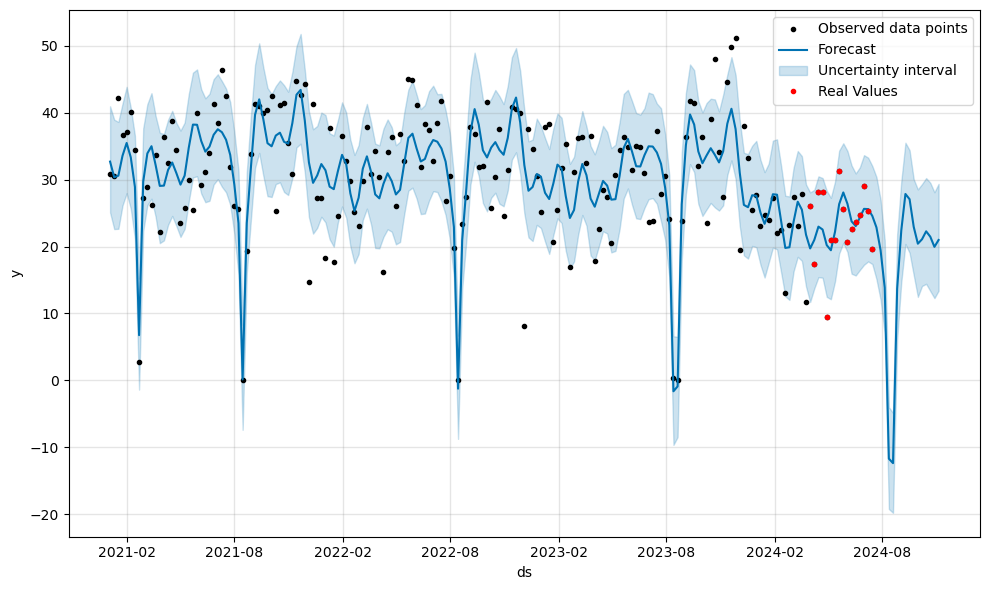

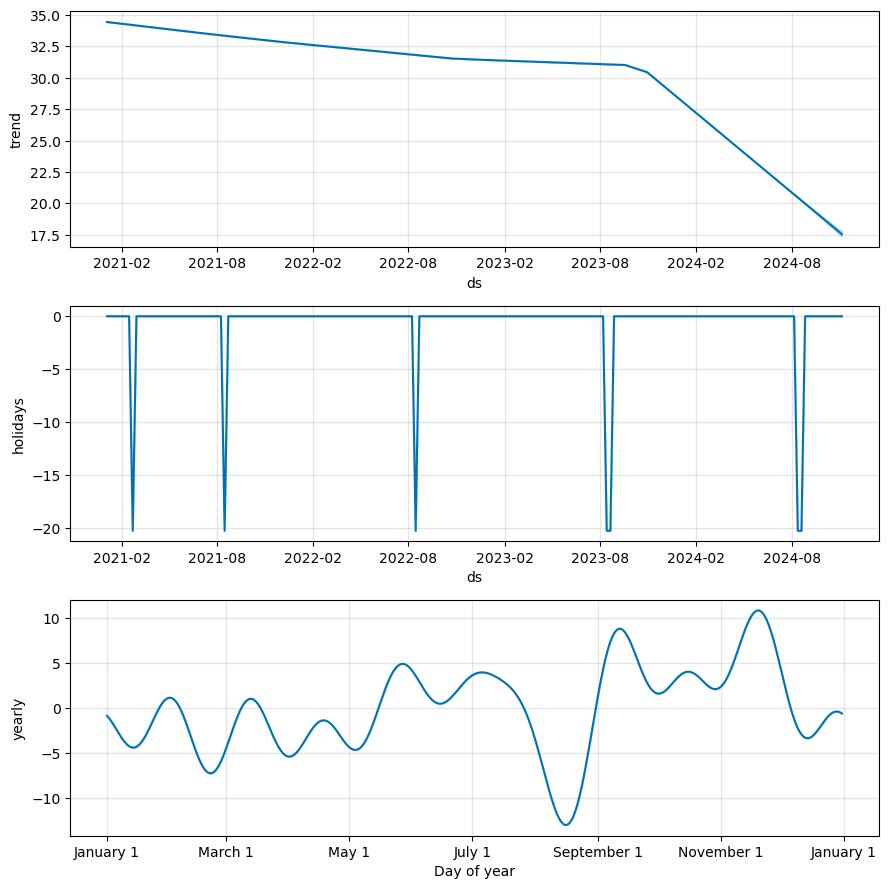

In [10]:
# Crear y entrenar el modelo Prophet
from prophet import Prophet

model = Prophet(holidays=all_vacations, interval_width=0.8, changepoint_prior_scale = best_changepoint_prior_scale) 

model.fit(df_prophet)

# Realizar una predicción para el futuro
future = model.make_future_dataframe(periods=16, freq='W-MON')
forecast = model.predict(future)

# Graficar los resultados
fig1 = model.plot(forecast)
plt.plot(df_prophet_test['ds'], df_prophet_test['y'], 'r.', label='Real Values')
plt.legend()
plt.show()

# Opcional: graficar los componentes de la predicción
fig2 = model.plot_components(forecast)
plt.show()

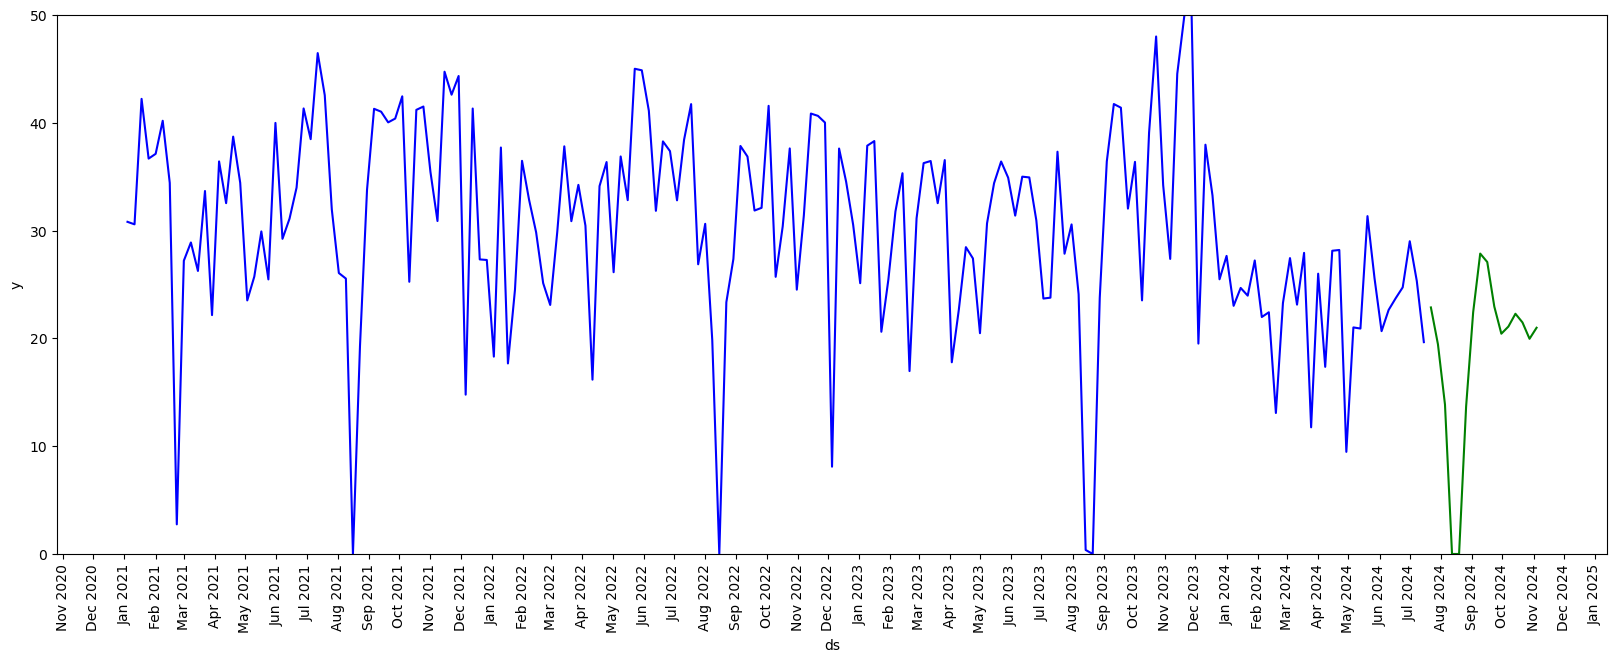

In [11]:
import matplotlib.dates as mdates

def limitar_cero(valor):
    if valor < 0:
        return 0
    else:
        return valor

y_pred_prophet = forecast[['ds','yhat']].tail(len(df_prophet_test))

y_pred_prophet['yhat'] = y_pred_prophet['yhat'].apply(limitar_cero)

#Trabajo Semanal
dims = (20, 7)
fig, ax = plt.subplots(figsize=dims)
ax.set_ylim(0,50)
plt.xticks(rotation=90)
sns.lineplot(data = df_prophet, x= 'ds', y= 'y', color = 'blue')
sns.lineplot(data = y_pred_prophet, x= 'ds', y= 'yhat', color = 'green')

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Ubicar las etiquetas en cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Mostrar solo el nombre del mes

plt.show()

In [12]:
y_pred_prophet.to_excel('./predictions/y_pred_prophet.xlsx')